In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch import Tensor

import math
import numpy as np

from tqdm.notebook import trange, tqdm
import matplotlib.pyplot as plt
import random

from pathlib import Path

## Set path to dir with model projects

In [2]:
projects_path = Path("/home/falaxdb/Repos/minus1/transformer_decoder_training/saved_files/saved_models")

device = torch.device("cuda" if torch.cuda.is_available() else 'cpu')

dataset_dir = "/home/falaxdb/Repos/minus1/datasets/maestro_v3_split/hands_split_into_seperate_midis"

import transformer_decoder_training.training_helper_functions as helper

Processed dataset (1038/1038): 100%|██████████| 1038/1038 [00:14<00:00, 72.80it/s]


Processed 1038 of 1038 files
The train loader has 1366 batches with a size of 5
The model is trained on approximately 6830 sequences
Start training Model with following parameters:
model_project_name: transformer_1.11_overfitted
model_params: 
  model_topology: Transformer(
  (embedding): Linear(in_features=24, out_features=1024, bias=True)
  (pos_emb): SinusoidalPosEmb()
  (blocks): ModuleList(
    (0-7): 8 x TransformerBlock(
      (norm1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      (multihead_attn): MultiheadAttention(
        (out_proj): NonDynamicallyQuantizableLinear(in_features=1024, out_features=1024, bias=True)
      )
      (norm2): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      (mlp): Sequential(
        (0): Linear(in_features=1024, out_features=4096, bias=True)
        (1): ELU(alpha=1.0)
        (2): Linear(in_features=4096, out_features=1024, bias=True)
      )
    )
  )
  (fc_out): Linear(in_features=1024, out_features=24, bias=True)
)
  

Epoch: 1, Train loss: 0.13315, Val loss: 0.11709, Epoch time = 455.539s


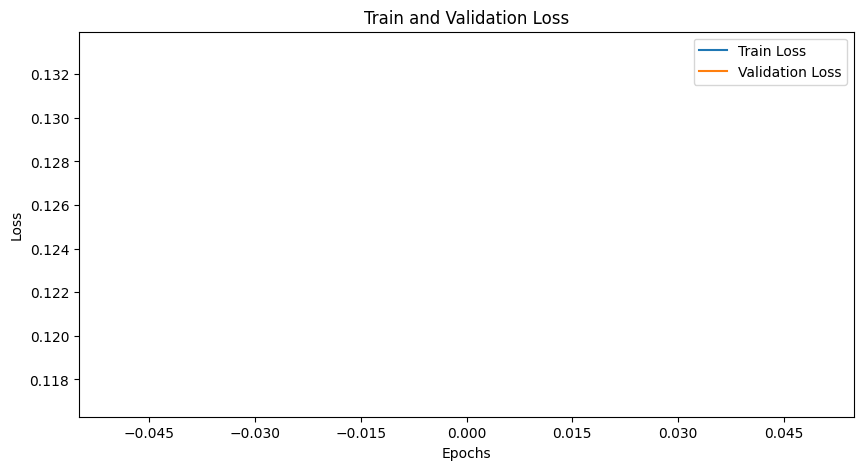

Epoch: 2, Train loss: 0.11890, Val loss: 0.11177, Epoch time = 442.241s


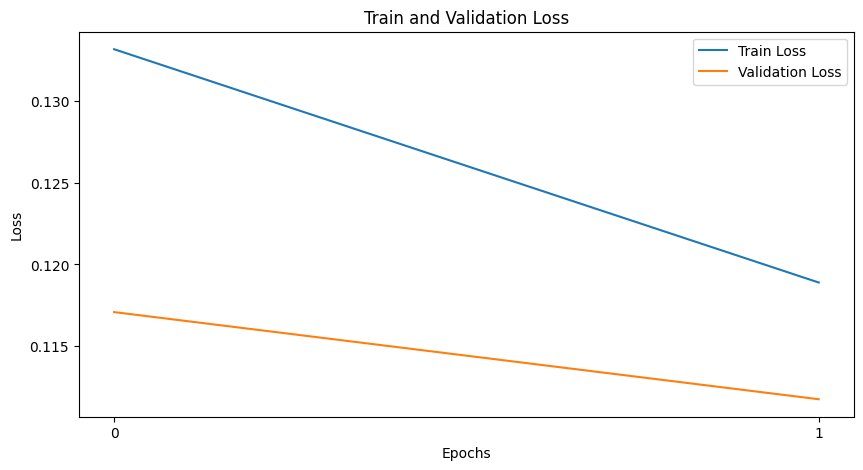

Epoch: 3, Train loss: 0.11325, Val loss: 0.10656, Epoch time = 435.138s


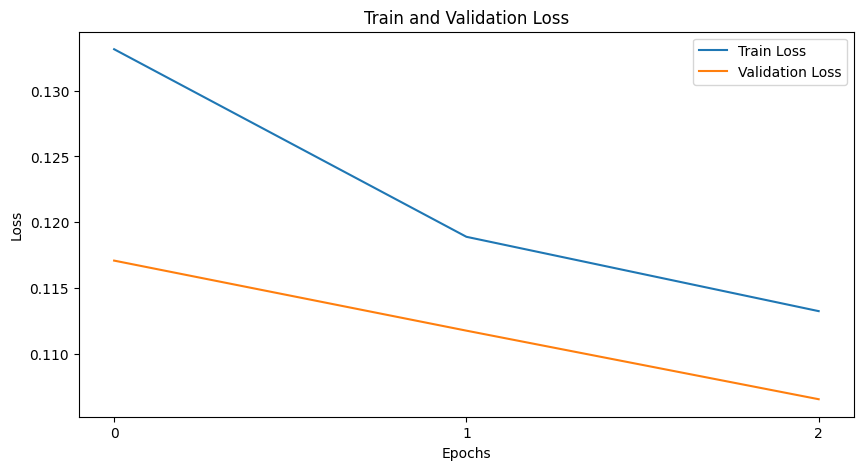

Epoch: 4, Train loss: 0.10790, Val loss: 0.10156, Epoch time = 435.477s


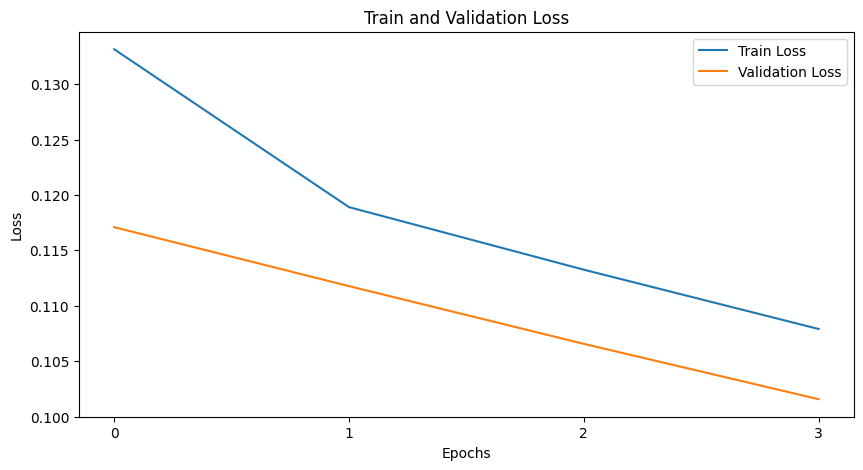

Epoch: 5, Train loss: 0.10342, Val loss: 0.09892, Epoch time = 435.359s


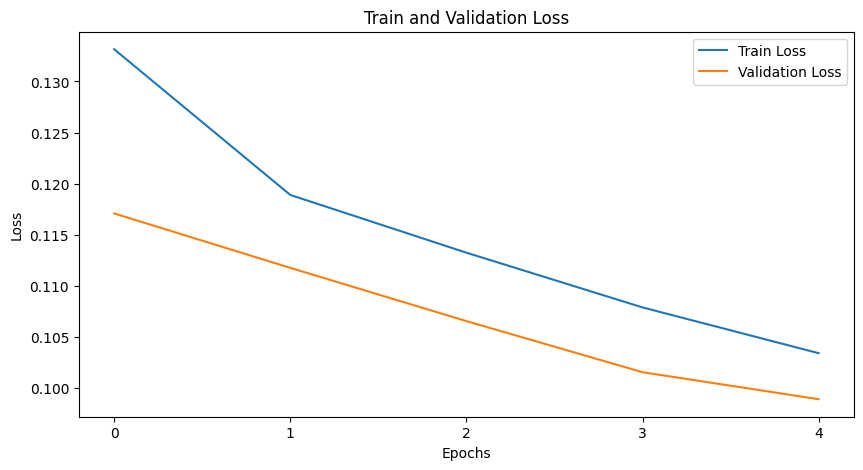

Epoch: 6, Train loss: 0.09976, Val loss: 0.09670, Epoch time = 435.377s


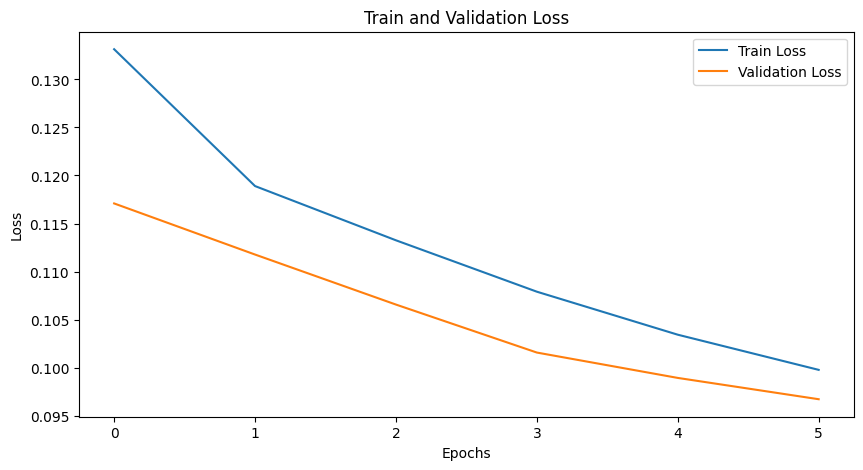

Epoch: 7, Train loss: 0.09631, Val loss: 0.09554, Epoch time = 435.462s


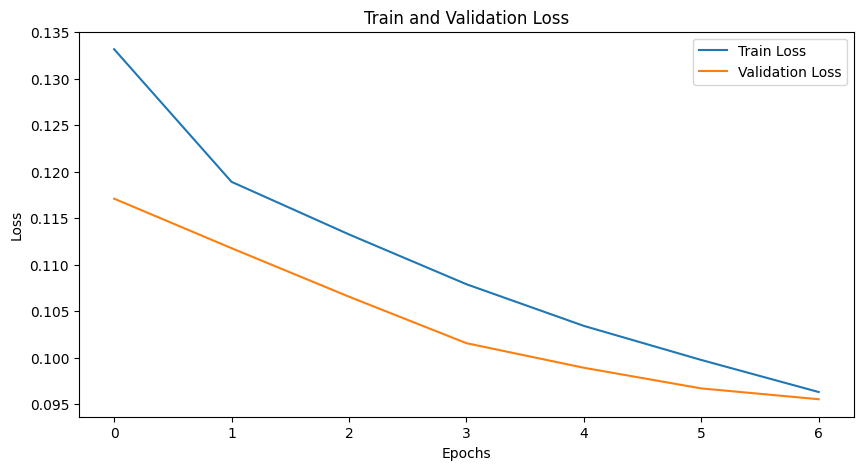

Epoch: 8, Train loss: 0.09306, Val loss: 0.09487, Epoch time = 435.359s


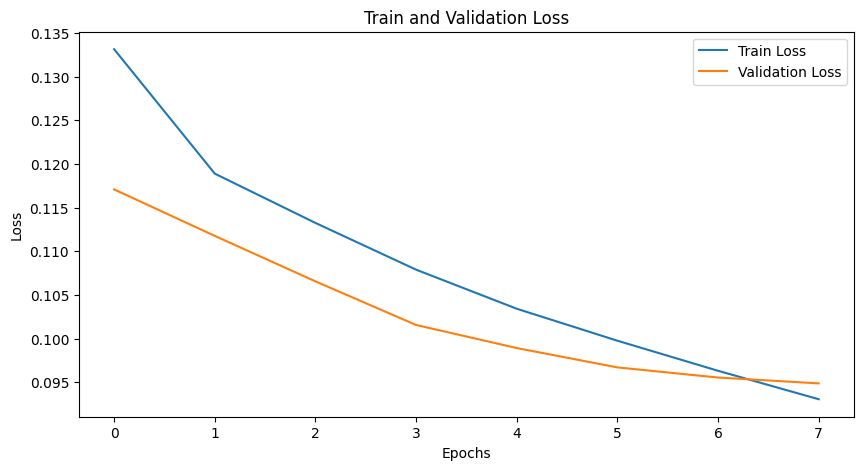

Epoch: 9, Train loss: 0.08957, Val loss: 0.09470, Epoch time = 435.461s


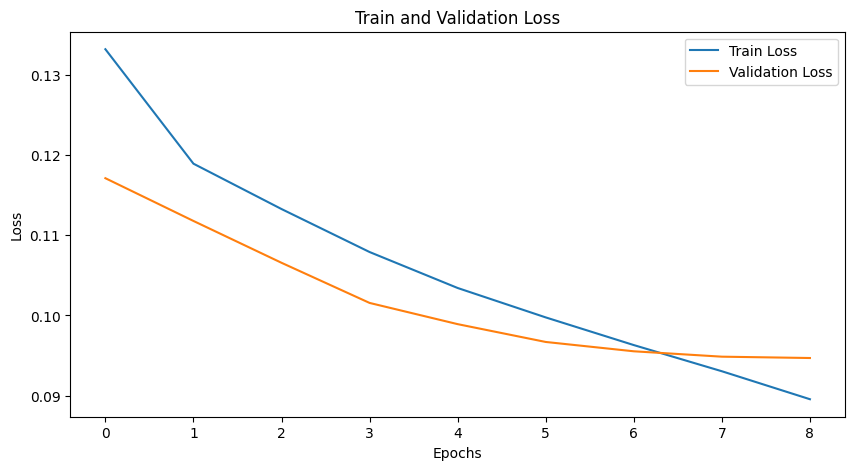

Epoch: 10, Train loss: 0.08587, Val loss: 0.09572, Epoch time = 435.411s


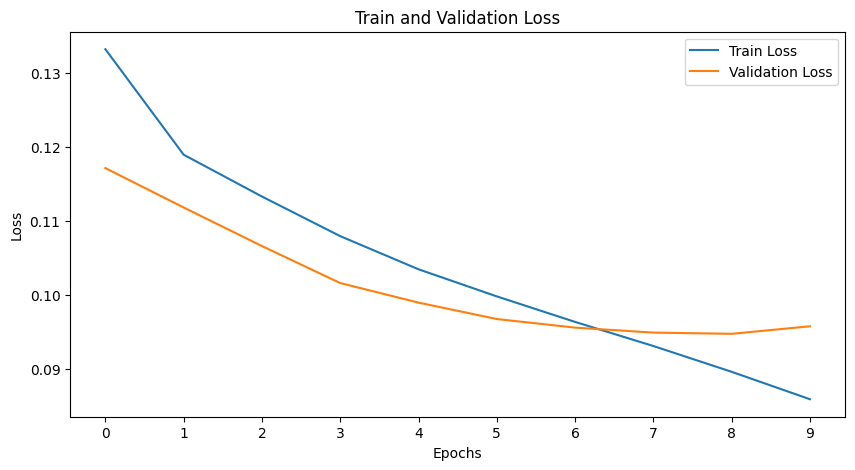

Epoch: 11, Train loss: 0.08185, Val loss: 0.09685, Epoch time = 435.442s


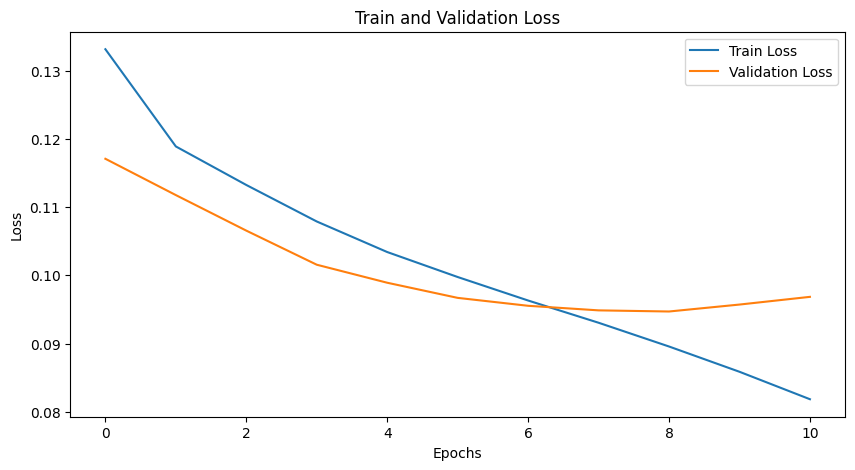

Epoch: 12, Train loss: 0.07737, Val loss: 0.09935, Epoch time = 435.511s


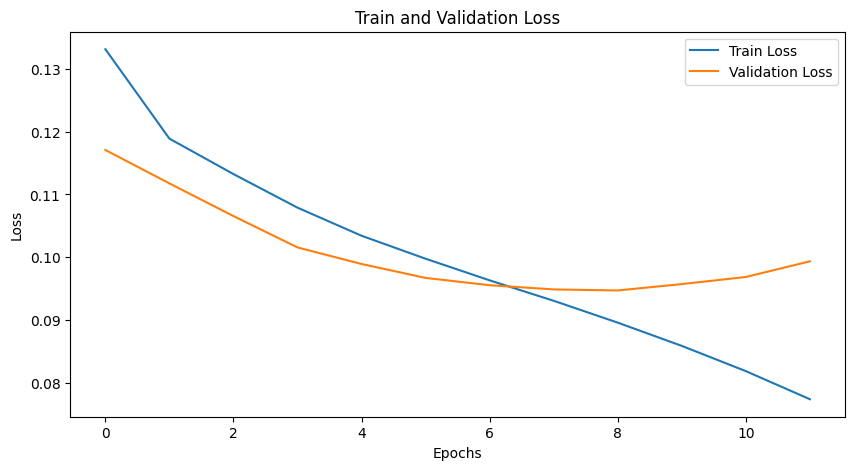

Epoch: 13, Train loss: 0.07261, Val loss: 0.10285, Epoch time = 435.434s


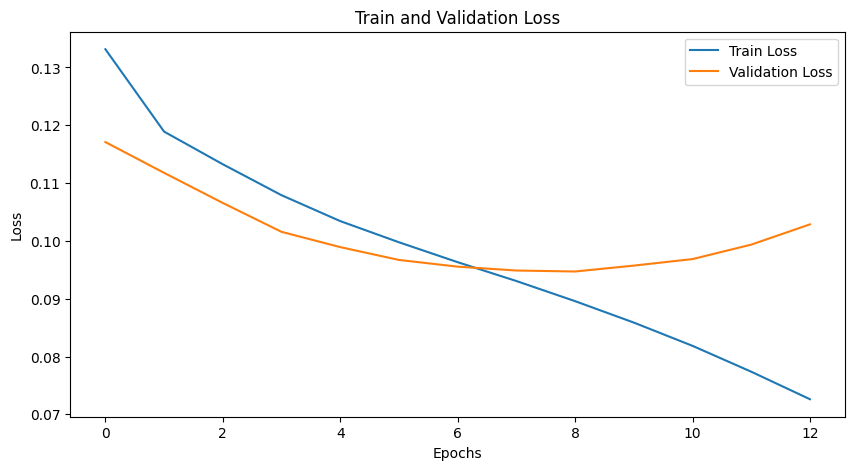

Epoch: 14, Train loss: 0.06764, Val loss: 0.10559, Epoch time = 435.465s


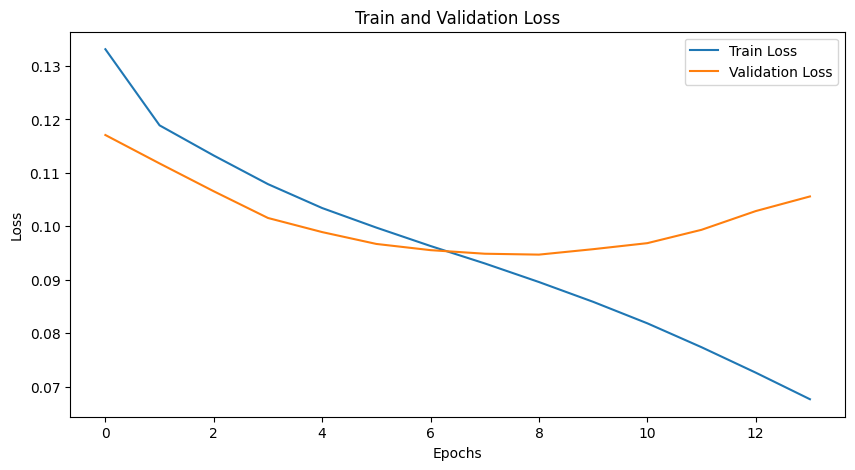

Epoch: 15, Train loss: 0.06245, Val loss: 0.11231, Epoch time = 435.620s


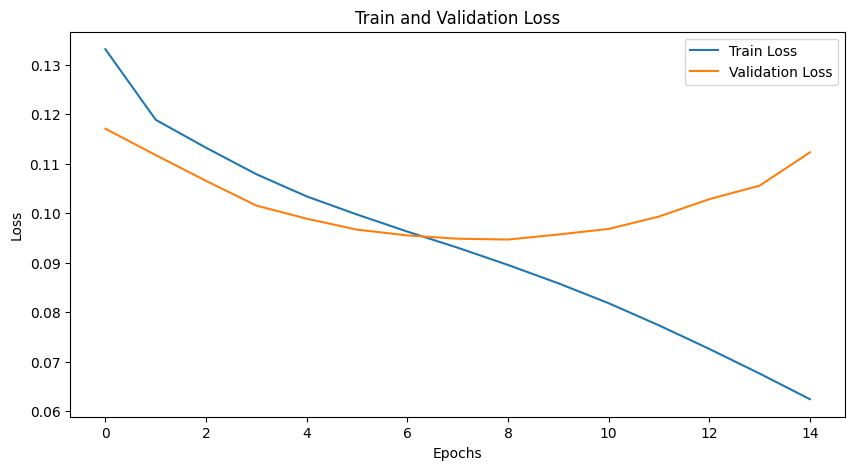

Epoch: 16, Train loss: 0.05743, Val loss: 0.11385, Epoch time = 435.651s


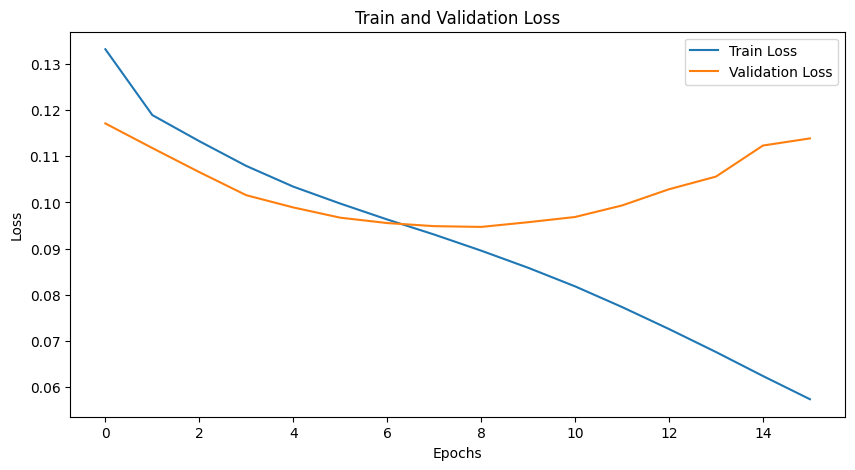

Epoch: 17, Train loss: 0.05243, Val loss: 0.12475, Epoch time = 435.631s


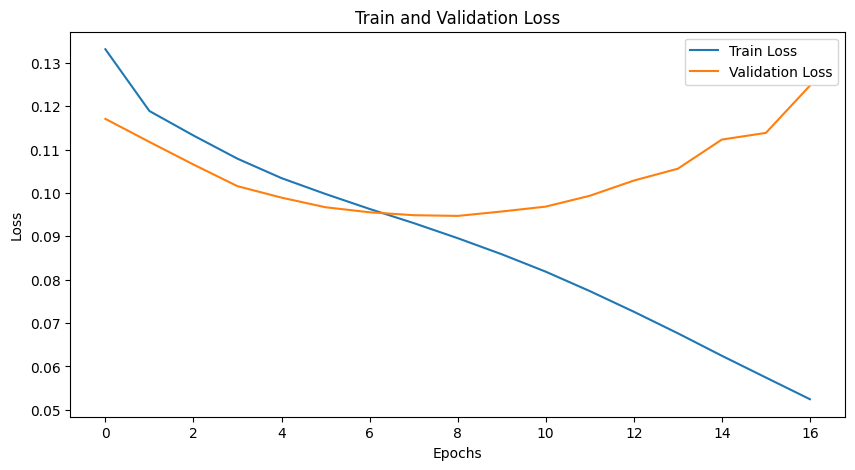

Epoch: 18, Train loss: 0.04776, Val loss: 0.13201, Epoch time = 435.781s


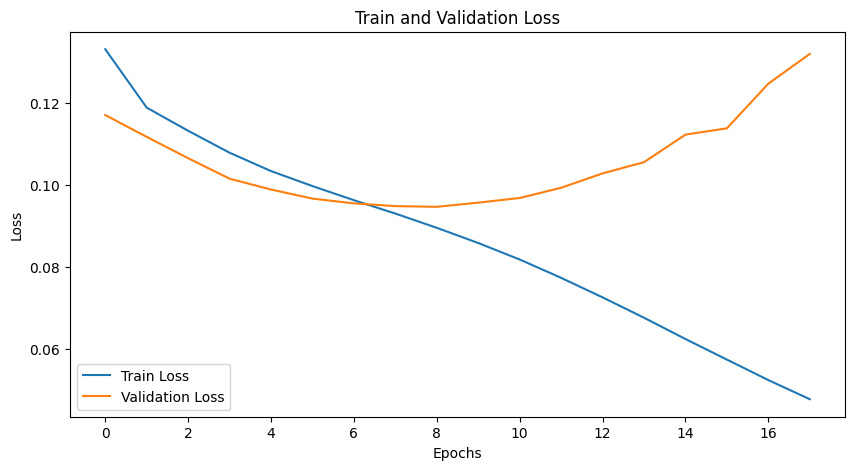

Epoch: 19, Train loss: 0.04350, Val loss: 0.13999, Epoch time = 435.654s


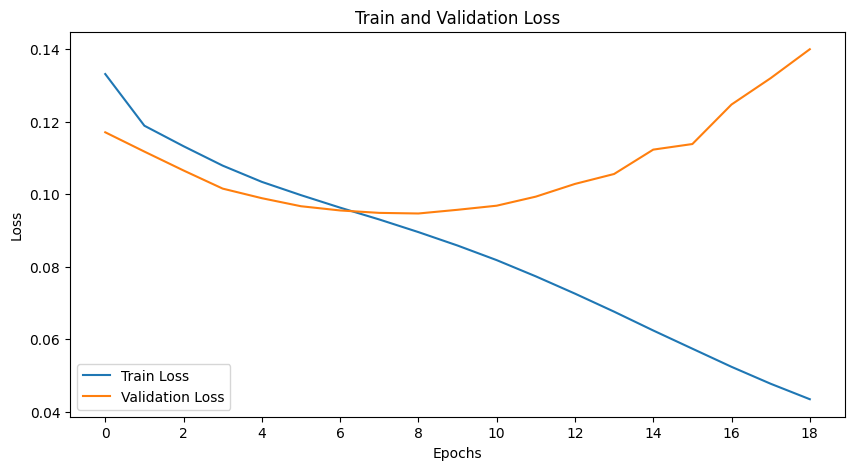

Epoch: 20, Train loss: 0.03954, Val loss: 0.14662, Epoch time = 435.722s


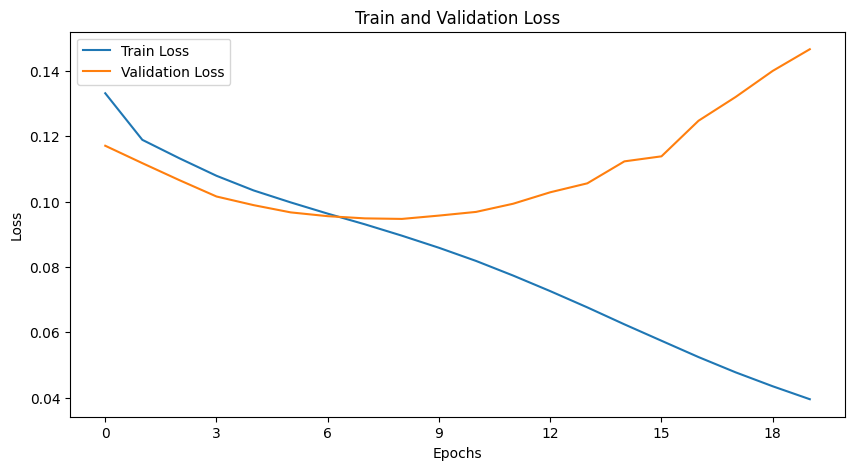

Epoch: 21, Train loss: 0.03600, Val loss: 0.15349, Epoch time = 435.773s


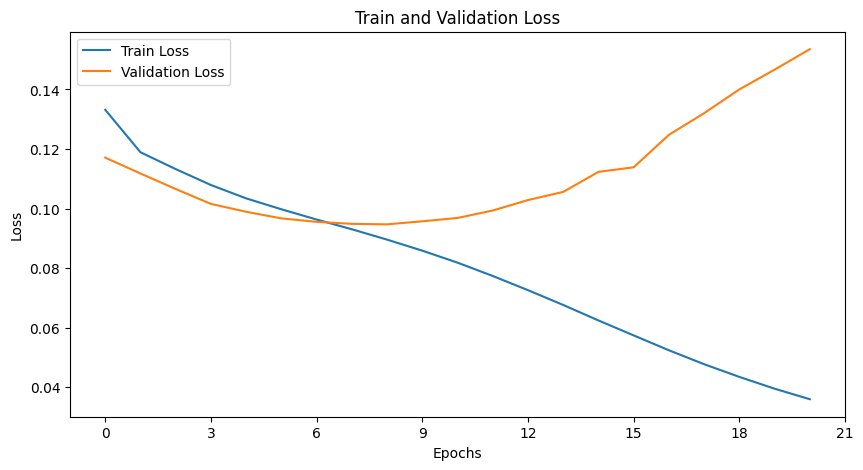

Epoch: 22, Train loss: 0.03284, Val loss: 0.16465, Epoch time = 435.682s


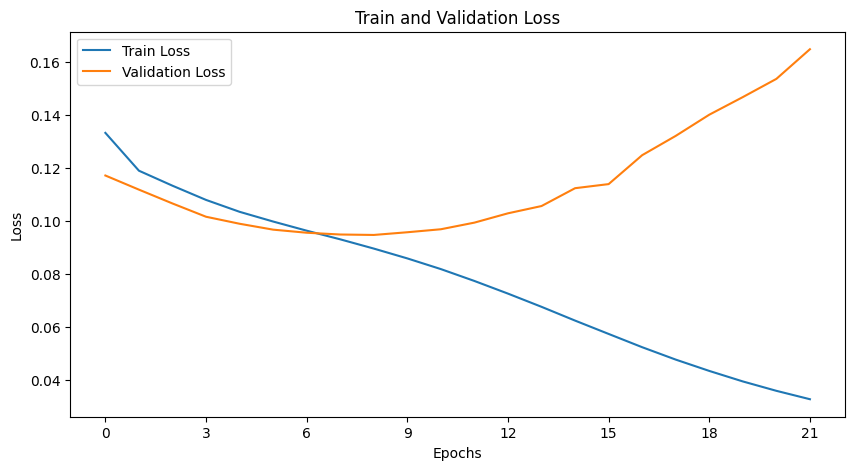

Epoch: 23, Train loss: 0.03021, Val loss: 0.16827, Epoch time = 437.144s


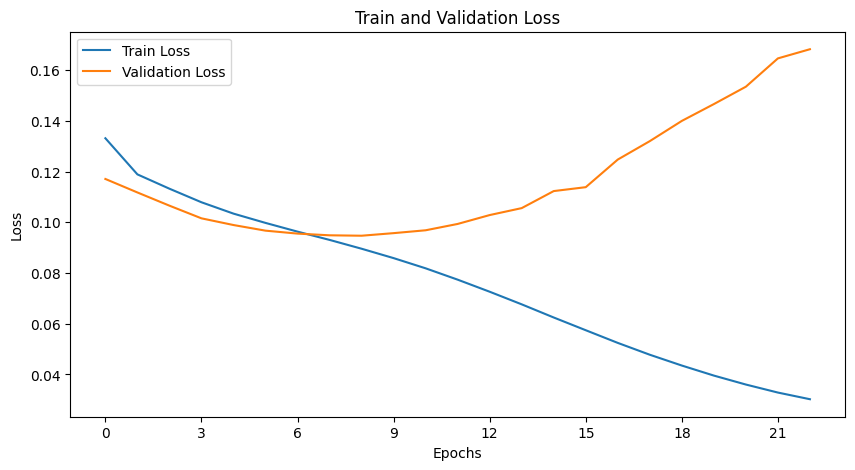

Training:   3%|▎         | 42/1366 [00:13<07:07,  3.10it/s]

KeyboardInterrupt: 

In [3]:
config = helper.create_json_template()

# Set model project name (for directory name)
config["model_project_name"] = "transformer_1.11_overfitted"

# Set model parameters
config["model_params"]["num_emb"] = 24
config["model_params"]["hidden_size"] = 1024
config["model_params"]["num_layers"] = 8
config["model_params"]["num_heads"] = 8
# config["model_params"]["output_dim"] = 10  can be set optionally

# Set training parameters
config["training_params"]["learning_rate"] = 0.0001
config["training_params"]["num_epochs"] = 200
config["training_params"]["optimizer"] = "Adam"
config["training_params"]["loss_fn"] = "BCEWithLogitsLoss"
config["training_params"]["loss_fn_parameters"]["alpha"] = 1
config["training_params"]["loss_fn_parameters"]["gamma"] = 1

# Set training data parameters
config["training_data_params"]["sos_token"] = [[1] * 24]
config["training_data_params"]["pad_token"] = [[2] * 24]
config["training_data_params"]["snapshot_interval"] = 0.05
config["training_data_params"]["batch_size"] = 5
config["training_data_params"]["sequence_length"] = 2048
config["training_data_params"]["stride"] = 512
config["training_data_params"]["test_size"] = 0.2

config_path = helper.save_json_config(config, projects_path)

helper.train_model_from_config(str(config_path), dataset_dir, device)